<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/Prueba_final_modelos_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [80]:
ruta_archivo_train = '/content/drive/My Drive/NHANES/dataset_train_imputado.csv'
ruta_archivo_test = '/content/drive/My Drive/NHANES/dataset_test_imputado.csv'


df_train = pd.read_csv(ruta_archivo_train)
df_test = pd.read_csv(ruta_archivo_test)


## **Explicación de las pruebas a realizar**

En principio se imputaron todas las variables que podrían servir para este proyecto. Esto se hizo con el fin de probar todos los modelos posibles  que permiten resolver el problema. Como el dataset ya tenía faltantes, sobre todo en lo que tiene que ver con los resultados de laboratorio, se podría haber aprovechado esto para hacer las pruebas por etapas, pero limita la cantidad de modelos a utilizar, ya que algunos no soportan faltantes. Según los resultados que se obtengan y los modelos que mejor funcionan, se podría realizar esta prueba o no.

Como primera etapa, se entrenarán los modelos con el dataset completo. Según los resultados obtenidos, se procederá a realizar las pruebas por etapas, es decir, entrenamiento con parte del dataset (datos básicos del paciente) y después con el dataset completo con el modelo seleccionado.

In [81]:
df_train.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,act_vigorosa,...,act_moderada_9.0,prediabetes_glucosa_alterada_2.0,prediabetes_glucosa_alterada_3.0,prediabetes_glucosa_alterada_9.0,ACV_2,ACV_9,colesterol_alto_2.0,colesterol_alto_9.0,riñones_debiles_fallando_2.0,riñones_debiles_fallando_9.0
0,0.252775,1,0.836629,-0.748731,0.196637,0.547785,0.950983,1,-0.455568,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.141000,0,0.541345,0.316824,1.472516,1.638509,0.256324,1,-0.455568,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.434103,1,-1.184465,0.695195,-0.744743,-0.095810,1.288207,0,-0.455568,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.928552,1,-0.517088,-0.239514,0.123914,0.168128,-0.065207,0,-0.455568,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.366015,1,0.350266,0.447201,-0.745748,-0.982146,1.606888,0,-0.455568,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [82]:
df_test.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,act_vigorosa,...,act_moderada_9.0,prediabetes_glucosa_alterada_2.0,prediabetes_glucosa_alterada_3.0,prediabetes_glucosa_alterada_9.0,ACV_2,ACV_9,colesterol_alto_2.0,colesterol_alto_9.0,riñones_debiles_fallando_2.0,riñones_debiles_fallando_9.0
0,-0.422269,1,-0.356620,-0.493765,0.273615,-0.209254,1.140880,0,-0.455568,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.266074,0,-0.136219,0.754733,0.060190,-0.128435,0.371970,1,2.364585,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.491089,0,-2.061674,-0.576858,-1.404786,-0.304637,-0.744758,1,-0.455568,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.096581,0,-1.827049,0.927919,-1.339257,-1.211241,0.091300,1,-0.455568,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.140268,0,0.276625,-0.661818,0.809700,-0.689028,1.871296,0,-0.455568,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   bmi                                    4454 non-null   float64
 7   fumo_100_cigarrillos                   4454 non-null   int64  
 8   fumador_actual                         4454 non-null   float64
 9   act_vigorosa                           4454 non-null   int64  
 10  realiza_actividad_intensidad_moderada  4454 non-null   int64  
 11  hora

In [84]:
# NIVEL 1: Datos de Primera Consulta (Anamnesis y Examen Físico Básico)
# Lo que el médico obtiene preguntando y pesando/midiendo al paciente.
# nivel_1_basico = [
#     'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
#     'fumador_actual', 'fumo_100_cigarrillos', 'consumo_alcohol_ultimo_año',
#     'consumo_excesivo_alcohol_ultimo_año', 'act_caminar_bici', 'act_moderada',
#     'act_vigorosa', 'realiza_actividad_intensidad_moderada',
#     'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
#     'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
# ]
nivel_1_basico = [
    'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
    'fumador_actual', 'consumo_alcohol_ultimo_año',
    'act_vigorosa', 'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
    'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
]

# NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# Datos que requieren una historia clínica o un tensiómetro.
nivel_2_antecedentes = [
    'fam_cardio', 'fam_asma', 'fam_diabetes', 'hipertension',
    'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
    'ACV', 'colesterol_alto', 'riñones_debiles_fallando',
    'presion_sistolica_final', 'presion_diastolica_final'
]

# NIVEL 3: Laboratorio Avanzado
# Resultados bioquímicos específicos.
nivel_3_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
    'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina'
]

# Unificamos todas para el entrenamiento inicial
features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

La glicohemoglobina no es de rutina. Normalmente se piden glucosa (es barata y básica), pero la glicohemoglobina solo se le pide a quienes ya se sospecha que son diabéticos o para control de tratamiento, por lo que se evitará usar este valor.

Si bien, en los test anova, información mutua dan una idea de que variables se podrían usar, también se tendrá en cuenta el hecho de que algunas pueden representar casi lo mismo, por lo que se elegirá una u otra.

In [85]:
df_train_temp = df_train.copy()
df_test_temp = df_test.copy()

# columnas_eliminadas = ['raza_origen_7','act_caminar_bici_2.0','act_caminar_bici_9.0','act_moderada_2.0','act_moderada_9.0',
#                        'raza_origen_1','raza_origen_2', 'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto_2.0',
#                        'colesterol_alto_9.0', 'ancho_distribucion_globulos','fam_asma_2.0', 'fam_asma_9.0',
#                        'glicohemoglobina','fumo_100_cigarrillos','realiza_actividad_intensidad_moderada',
#                        'consumo_excesivo_alcohol_ultimo_año']

columnas_eliminadas = ['raza_origen_7','act_caminar_bici_2.0','act_caminar_bici_9.0','act_moderada_2.0','act_moderada_9.0',
                       'raza_origen_1','raza_origen_2', 'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto_2.0',
                       'colesterol_alto_9.0','fumador_actual', 'ancho_distribucion_globulos','fam_asma_2.0', 'fam_asma_9.0',
                       'glicohemoglobina','realiza_actividad_intensidad_moderada',
                       'consumo_excesivo_alcohol_ultimo_año','act_vigorosa']

df_train_temp.drop(columns=columnas_eliminadas, inplace=True)
df_test_temp.drop(columns=columnas_eliminadas, inplace=True)

df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   bmi                                    4454 non-null   float64
 7   fumo_100_cigarrillos                   4454 non-null   int64  
 8   horas_suenio                           4454 non-null   float64
 9   anhedonia                              4454 non-null   float64
 10  hemoglobina                            4454 non-null   float64
 11  crea

In [86]:
TARGET = "alto_riesgo"

X_train = df_train_temp.drop(columns=[TARGET])
y_train = df_train_temp[TARGET]

X_test = df_test_temp.drop(columns=[TARGET])
y_test = df_test_temp[TARGET]


In [87]:
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluar_overfitting(
    modelo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.25,
    nombre="Modelo"
):

    # Probabilidades
    prob_train = modelo.predict_proba(X_train)[:, 1]
    prob_test = modelo.predict_proba(X_test)[:, 1]

    # Predicciones binarias
    pred_train = (prob_train >= threshold).astype(int)
    pred_test = (prob_test >= threshold).astype(int)

    # Métricas train
    auc_train = roc_auc_score(y_train, prob_train)
    recall_train = recall_score(y_train, pred_train)
    precision_train = precision_score(y_train, pred_train)
    f1_train = f1_score(y_train, pred_train)

    # Métricas test
    auc_test = roc_auc_score(y_test, prob_test)
    recall_test = recall_score(y_test, pred_test)
    precision_test = precision_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"\n===== {nombre} ====")
    print("---- TRAIN ----")
    print(f"AUC: {auc_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"F1: {f1_train:.4f}")

    print("\n---- TEST ----")
    print(f"AUC: {auc_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"F1: {f1_test:.4f}")

    auc_gap = auc_train - auc_test
    recall_gap = recall_train - recall_test
    print(f"\n---- GAP (Train-Test) ----")
    print(f"AUC gap: {auc_gap:.4f}")
    print(f"Recall gap: {recall_gap:.4f}")

    # Matriz de confusión para el conjunto de prueba
    cm = confusion_matrix(y_test, pred_test)
    labels = ["Bajo riesgo", "Alto riesgo"]

    # Normalizar la matriz de confusión para mostrar porcentajes
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm_normalized,
        annot=True,
        fmt=".2%", # Formato de porcentaje con 2 decimales
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión Normalizada - {nombre} (TEST)")
    plt.show()

    return {
        "auc_train": auc_train,
        "recall_train": recall_train,
        "precision_train": precision_train,
        "f1_train": f1_train,
        "auc_test": auc_test,
        "recall_test": recall_test,
        "precision_test": precision_test,
        "f1_test": f1_test,
        "auc_gap": auc_gap,
        "recall_gap": recall_gap
    }

# **PRUEBAS SIN BALANCEO**

Se hace prueba inicial sin balanceo. Se espera que, dado el gran desbalance del target, los reusltados no sean buenos.

Se prueba: Ramdom forest, xgboost(sin balance), Regresión logística, Árbol de decisión, SVM


In [88]:
results = []

### ***RAMDOM FOREST***


===== Random Forest (No Balanceo) ====
---- TRAIN ----
AUC: 0.9203
Recall: 0.3791
Precision: 0.7442
F1: 0.5024

---- TEST ----
AUC: 0.8492
Recall: 0.1619
Precision: 0.4474
F1: 0.2378

---- GAP (Train-Test) ----
AUC gap: 0.0711
Recall gap: 0.2172


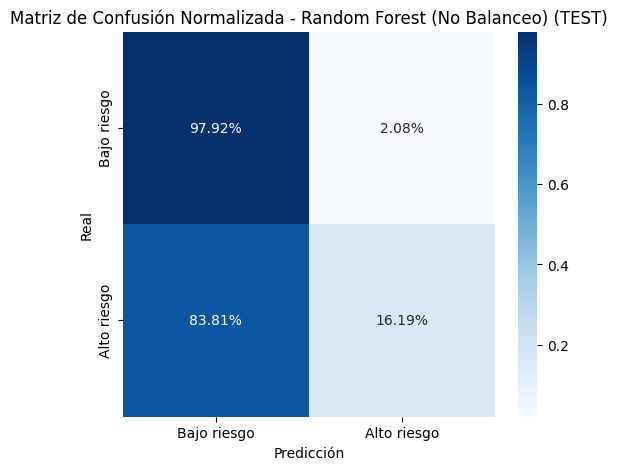

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
modelo_rf_nobalanceo = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_rf_nobalanceo.fit(X_train, y_train)

# Se campturan métricas
rf_nobalanceo_metrics = evaluar_overfitting(
    modelo_rf_nobalanceo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="Random Forest (No Balanceo)"
)

# Se agregan las métricas a la lista de resultados
results.append({"Modelo": "Random Forest (Sin Balanceo)", **rf_nobalanceo_metrics})

### ***XGBOOST***


===== XGBoost (Sin Balanceo) ====
---- TRAIN ----
AUC: 0.9040
Recall: 0.4858
Precision: 0.5037
F1: 0.4946

---- TEST ----
AUC: 0.8554
Recall: 0.3524
Precision: 0.3978
F1: 0.3737

---- GAP (Train-Test) ----
AUC gap: 0.0487
Recall gap: 0.1334


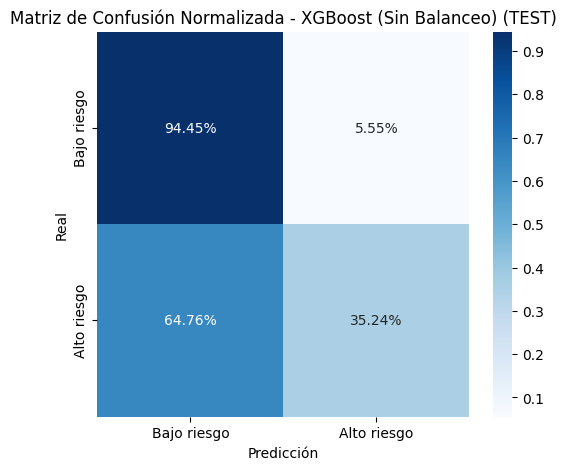

In [90]:
from xgboost import XGBClassifier

# Modelo XGBoost
modelo_xgb_nobalanceo = XGBClassifier(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=2,
    eval_metric="auc",
    random_state=42
)

modelo_xgb_nobalanceo.fit(X_train, y_train)

xgb_nobalanceo_metrics = evaluar_overfitting(
    modelo_xgb_nobalanceo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="XGBoost (Sin Balanceo)"
)

results.append({"Modelo": "XGBoost (Sin Balanceo)", **xgb_nobalanceo_metrics})

### ***LOGISTIC REGRESSION***


===== Logistic Regression (No Balanceo) ====
---- TRAIN ----
AUC: 0.8867
Recall: 0.3009
Precision: 0.5020
F1: 0.3763

---- TEST ----
AUC: 0.8669
Recall: 0.2571
Precision: 0.4500
F1: 0.3273

---- GAP (Train-Test) ----
AUC gap: 0.0197
Recall gap: 0.0438


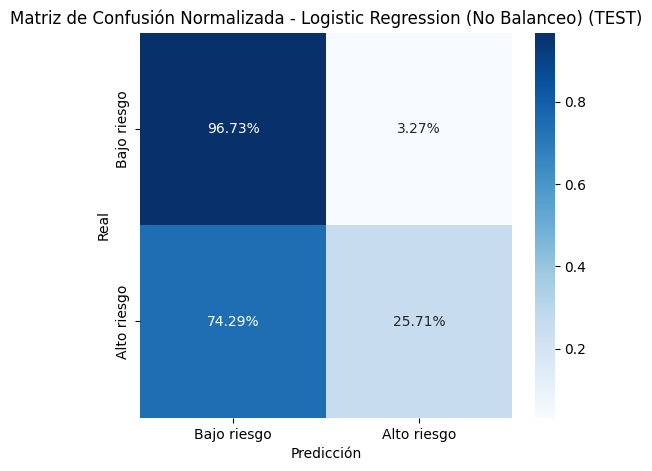

In [91]:
from sklearn.linear_model import LogisticRegression

modelo_lr_nobalanceo = LogisticRegression(
    max_iter=2000,
    random_state=42
)

modelo_lr_nobalanceo.fit(X_train, y_train)

lr_nobalanceo_metrics = evaluar_overfitting(
    modelo_lr_nobalanceo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression (No Balanceo)"
)

results.append({"Modelo": "Logistic Regression (No Balanceo)", **lr_nobalanceo_metrics})

### ***DECISION TREE***


===== Decision Tree (No Balanceo) ====
---- TRAIN ----
AUC: 0.8701
Recall: 0.4526
Precision: 0.4885
F1: 0.4699

---- TEST ----
AUC: 0.7426
Recall: 0.2381
Precision: 0.2809
F1: 0.2577

---- GAP (Train-Test) ----
AUC gap: 0.1275
Recall gap: 0.2145


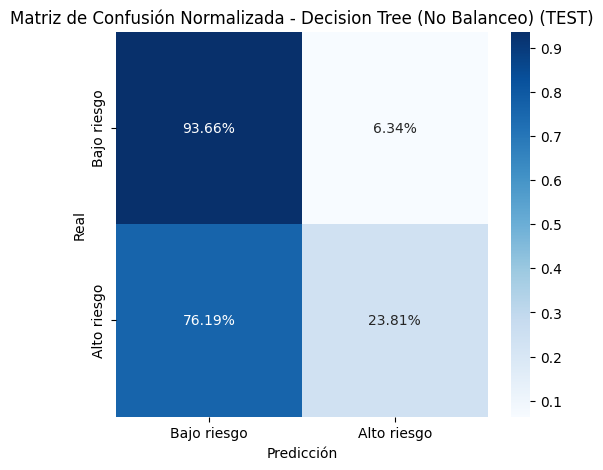

In [92]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt_nobalanceo = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

modelo_dt_nobalanceo.fit(X_train, y_train)

dt_nobalanceo_metrics = evaluar_overfitting(
    modelo_dt_nobalanceo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="Decision Tree (No Balanceo)"
)

results.append({"Modelo": "Decision Tree (No Balanceo)", **dt_nobalanceo_metrics})

### ***SVM***


===== SVM Linear Kernel (Sin Balanceo) ====
---- TRAIN ----
AUC: 0.8528
Recall: 0.0000
Precision: 0.0000
F1: 0.0000

---- TEST ----
AUC: 0.8335
Recall: 0.0000
Precision: 0.0000
F1: 0.0000

---- GAP (Train-Test) ----
AUC gap: 0.0193
Recall gap: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


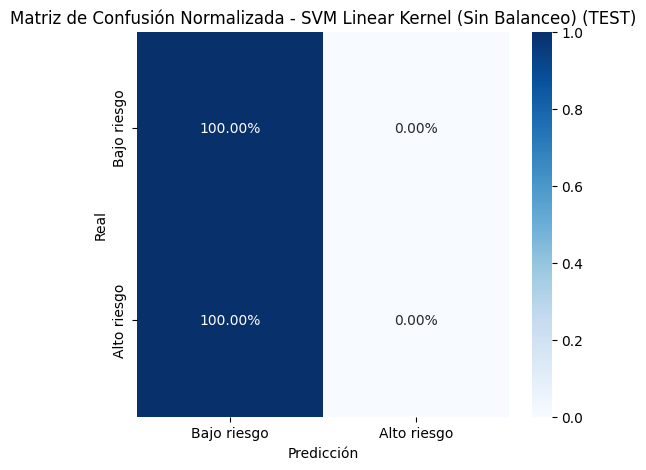

In [93]:
from sklearn.svm import SVC

modelo_svm_nobalanceo = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
)

modelo_svm_nobalanceo.fit(X_train, y_train)

svm_nobalanceo_metrics = evaluar_overfitting(
    modelo_svm_nobalanceo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="SVM Linear Kernel (Sin Balanceo)"
)

results.append({"Modelo": "SVM Linear Kernel (No Balanceo)", **svm_nobalanceo_metrics})

In [94]:
import pandas as pd

df_nobalanceo_results = pd.DataFrame(results)

df_nobalanceo_results

,Modelo,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Random Forest (Sin Balanceo),0.920296,0.379147,0.744186,0.502355,0.849158,0.161905,0.447368,0.237762,0.071138,0.217242
1,XGBoost (Sin Balanceo),0.904044,0.485782,0.503686,0.494572,0.855387,0.352381,0.397849,0.373737,0.048656,0.133401
2,Logistic Regression (No Balanceo),0.886694,0.300948,0.501976,0.376296,0.866950,0.257143,0.450000,0.327273,0.019745,0.043805
3,Decision Tree (No Balanceo),0.870100,0.452607,0.488491,0.469865,0.742635,0.238095,0.280899,0.257732,0.127464,0.214511
4,SVM Linear Kernel (No Balanceo),0.852842,0.000000,0.000000,0.000000,0.833517,0.000000,0.000000,0.000000,0.019325,0.000000


# **PRUEBAS CON BALANCEO**

Se prueban los mismos modelos pero con balanceo. Además se agrega a modo de prueba el Balanced Ramdom Forest, un modelo especialmente pensado para lidear con desbalances en los datasets.

In [95]:
# Inicializamos la lista para almacenar los resultados de los modelos
results = []

## **RAMDOM FOREST**

### ***BALANCEO PROPIO***


===== Random Forest (Class Weight Balanced) ====
---- TRAIN ----
AUC: 0.9186
Recall: 0.9431
Precision: 0.2399
F1: 0.3825

---- TEST ----
AUC: 0.8452
Recall: 0.8476
Precision: 0.2155
F1: 0.3436

---- GAP (Train-Test) ----
AUC gap: 0.0734
Recall gap: 0.0955


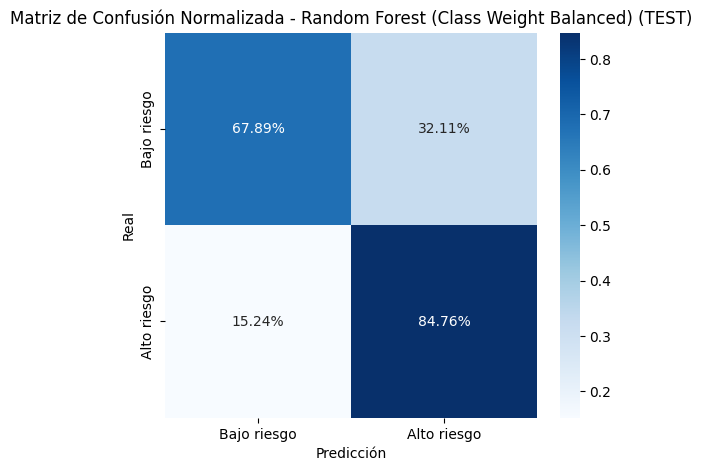

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest con class_weight='balanced'
modelo_rf_balanced_weight = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

modelo_rf_balanced_weight.fit(X_train, y_train)

rf_balanced_weight_metrics = evaluar_overfitting(
    modelo_rf_balanced_weight,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Random Forest (Class Weight Balanced)"
)

results.append({"Modelo": "Random Forest (Class Weight Balanced)", **rf_balanced_weight_metrics})

### ***SMOTE***

Antes SMOTE:
alto_riesgo
0    4032
1     422
Name: count, dtype: int64

Después SMOTE:
alto_riesgo
0    4032
1    2016
Name: count, dtype: int64

===== Random Forest + SMOTE ====
---- TRAIN ----
AUC: 0.9587
Recall: 0.8953
Precision: 0.7787
F1: 0.8329

---- TEST ----
AUC: 0.8451
Recall: 0.5810
Precision: 0.3096
F1: 0.4040

---- GAP (Train-Test) ----
AUC gap: 0.1135
Recall gap: 0.3144


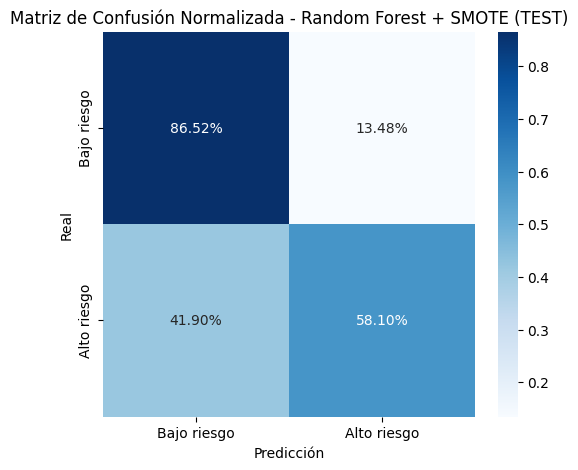

In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(
    sampling_strategy=0.5,
    random_state=42,
    k_neighbors=3
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Antes SMOTE:")
print(y_train.value_counts())

print("\nDespués SMOTE:")
print(y_train_sm.value_counts())


# Modelo
modelo_smote = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_smote.fit(X_train_sm, y_train_sm)

rf_smote_metrics = evaluar_overfitting(
    modelo_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="Random Forest + SMOTE"
)

results.append({"Modelo": "Random Forest + SMOTE", **rf_smote_metrics})

### ***UNDERSAMPLING***

In [98]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(
    sampling_strategy=0.5,
    random_state=42
)

X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Antes Undersampling:")
print(y_train.value_counts())

print("\nDespués Undersampling:")
print(y_train_under.value_counts())

Antes Undersampling:
alto_riesgo
0    4032
1     422
Name: count, dtype: int64

Después Undersampling:
alto_riesgo
0    844
1    422
Name: count, dtype: int64



===== Random Forest (Undersampling) ====
---- TRAIN ----
AUC: 0.9345
Recall: 0.8412
Precision: 0.7474
F1: 0.7915

---- TEST ----
AUC: 0.8533
Recall: 0.7333
Precision: 0.2906
F1: 0.4162

---- GAP (Train-Test) ----
AUC gap: 0.0811
Recall gap: 0.1079


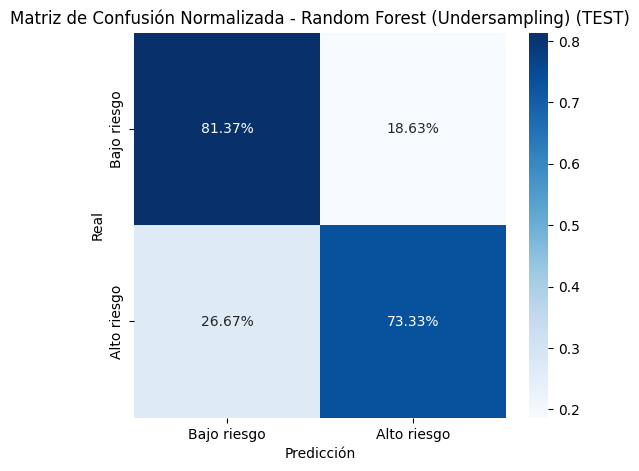

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest con Undersampling
modelo_rf_under = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_rf_under.fit(X_train_under, y_train_under)

rf_under_metrics = evaluar_overfitting(
    modelo_rf_under,
    X_train_under, y_train_under,
    X_test, y_test,
    threshold=0.4,
    nombre="Random Forest (Undersampling)"
)

results.append({"Modelo": "Random Forest (Undersampling)", **rf_under_metrics})

## **XGBOOST**

### ***SMOTE***


===== XGBoost ====
---- TRAIN ----
AUC: 0.9551
Recall: 0.9380
Precision: 0.6927
F1: 0.7969

---- TEST ----
AUC: 0.8460
Recall: 0.7333
Precision: 0.2692
F1: 0.3939

---- GAP (Train-Test) ----
AUC gap: 0.1091
Recall gap: 0.2047


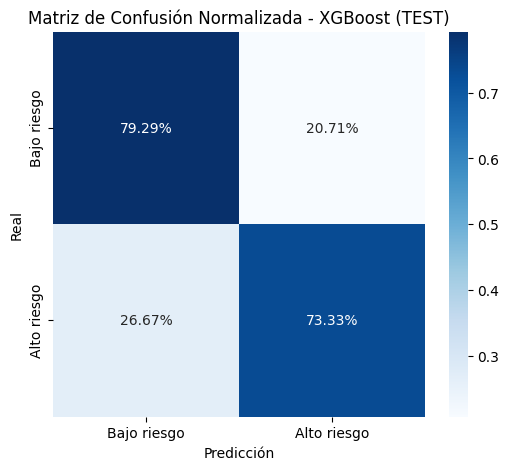

In [100]:
from xgboost import XGBClassifier

# ratio clases para penalización
ratio = (y_train == 0).sum() / (y_train == 1).sum() #9.55

modelo_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=2,
    scale_pos_weight=2, # Mejor valor encontrado
    eval_metric="auc",
    random_state=42
)

modelo_xgb.fit(X_train_sm, y_train_sm)

xgb_metrics = evaluar_overfitting(
    modelo_xgb,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="XGBoost"
)

results.append({"Modelo": "XGBoost", **xgb_metrics})

## **BALANCED RADOM FOREST**


===== Balanced RF (Class Weight Balanced) ====
---- TRAIN ----
AUC: 0.9987
Recall: 1.0000
Precision: 0.3307
F1: 0.4971

---- TEST ----
AUC: 0.8474
Recall: 0.8000
Precision: 0.2478
F1: 0.3784

---- GAP (Train-Test) ----
AUC gap: 0.1513
Recall gap: 0.2000


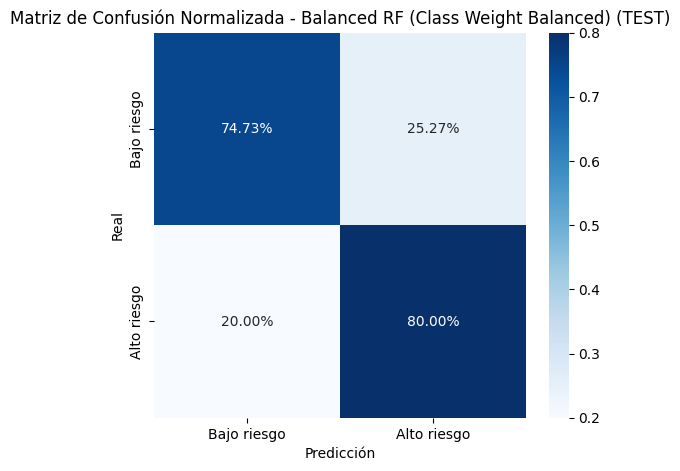

In [101]:
from imblearn.ensemble import BalancedRandomForestClassifier

modelo_brf = BalancedRandomForestClassifier(
    n_estimators=400,
    random_state=42
)

modelo_brf.fit(X_train, y_train)

brf_metrics = evaluar_overfitting(
    modelo_brf,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Balanced RF (Class Weight Balanced)"
)

results.append({"Modelo": "Balanced Random Forest (Class Weight Balanced)", **brf_metrics})


## **LOGISTIC REGRESSION**

### ***CON BALANCEO PROPIO***


===== Logistic Regression (Class Weight Balanced) ====
---- TRAIN ----
AUC: 0.8878
Recall: 0.8815
Precision: 0.2557
F1: 0.3964

---- TEST ----
AUC: 0.8681
Recall: 0.8571
Precision: 0.2521
F1: 0.3896

---- GAP (Train-Test) ----
AUC gap: 0.0197
Recall gap: 0.0244


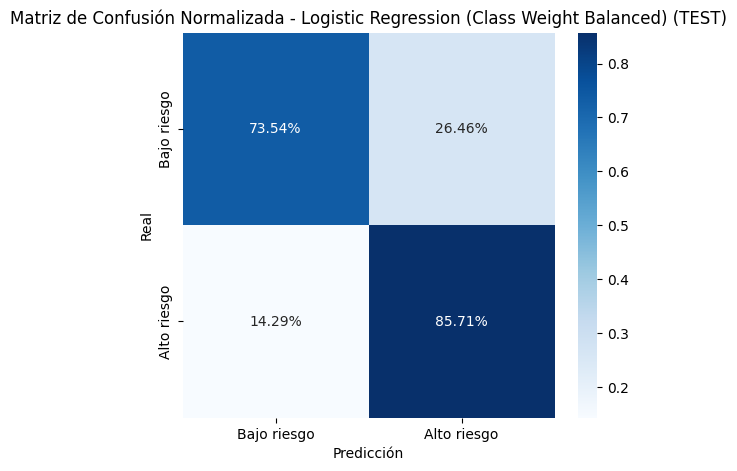

In [102]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)

modelo_lr.fit(X_train, y_train)

lr_metrics = evaluar_overfitting(
    modelo_lr,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression (Class Weight Balanced)"
)

results.append({"Modelo": "Logistic Regression", **lr_metrics})

### ***SMOTE***


===== Logistic Regression + SMOTE ====
---- TRAIN ----
AUC: 0.9036
Recall: 0.8249
Precision: 0.7212
F1: 0.7696

---- TEST ----
AUC: 0.8599
Recall: 0.6952
Precision: 0.3080
F1: 0.4269

---- GAP (Train-Test) ----
AUC gap: 0.0437
Recall gap: 0.1297


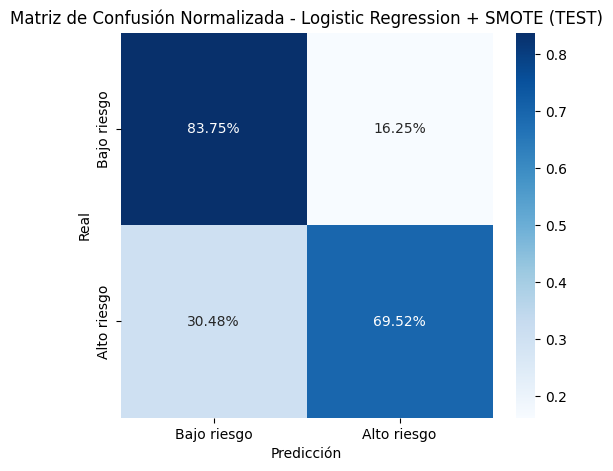

In [103]:
from sklearn.linear_model import LogisticRegression

modelo_lr_smote = LogisticRegression(
    max_iter=2000,
    random_state=42
)

modelo_lr_smote.fit(X_train_sm, y_train_sm)

lr_smote_metrics = evaluar_overfitting(
    modelo_lr_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression + SMOTE"
)

results.append({"Modelo": "Logistic Regression + SMOTE", **lr_smote_metrics})

### ***UNDERSAMPLING***


===== Logistic Regression + Undersampling ====
---- TRAIN ----
AUC: 0.8879
Recall: 0.7844
Precision: 0.7088
F1: 0.7447

---- TEST ----
AUC: 0.8670
Recall: 0.7238
Precision: 0.2992
F1: 0.4234

---- GAP (Train-Test) ----
AUC gap: 0.0209
Recall gap: 0.0606


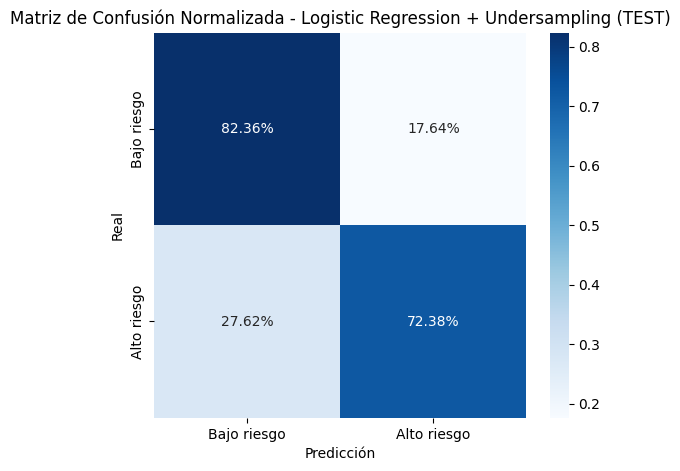

In [104]:
from sklearn.linear_model import LogisticRegression

modelo_lr_under = LogisticRegression(
    max_iter=2000,
    random_state=42
)

modelo_lr_under.fit(X_train_under, y_train_under)

lr_under_metrics = evaluar_overfitting(
    modelo_lr_under,
    X_train_under, y_train_under,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression + Undersampling"
)

results.append({"Modelo": "Logistic Regression + Undersampling", **lr_under_metrics})

## **DECISION TREE**

### ***BALANCEO PROPIO***


===== Decision Tree (Class Weight Balanced) ====
---- TRAIN ----
AUC: 0.8908
Recall: 0.9479
Precision: 0.2441
F1: 0.3882

---- TEST ----
AUC: 0.7602
Recall: 0.7714
Precision: 0.1990
F1: 0.3164

---- GAP (Train-Test) ----
AUC gap: 0.1306
Recall gap: 0.1764


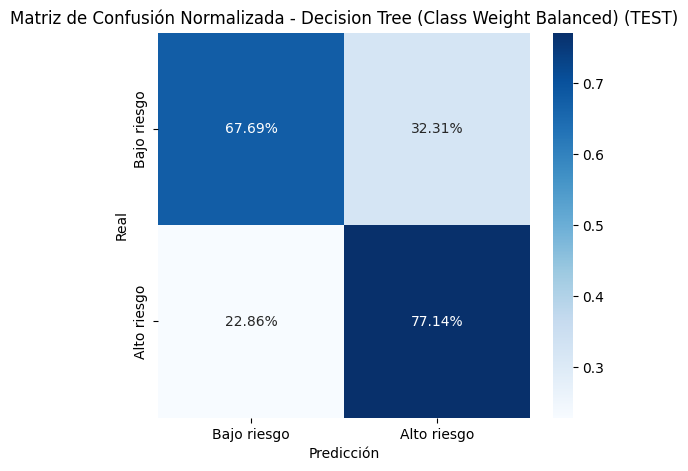

In [105]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

modelo_dt.fit(X_train, y_train)

dt_metrics = evaluar_overfitting(
    modelo_dt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Decision Tree (Class Weight Balanced)"
)

results.append({"Modelo": "Decision Tree Classifier", **dt_metrics})

### ***SMOTE***


===== Decision Tree + SMOTE ====
---- TRAIN ----
AUC: 0.9339
Recall: 0.8185
Precision: 0.7857
F1: 0.8017

---- TEST ----
AUC: 0.8028
Recall: 0.4762
Precision: 0.2747
F1: 0.3484

---- GAP (Train-Test) ----
AUC gap: 0.1311
Recall gap: 0.3423


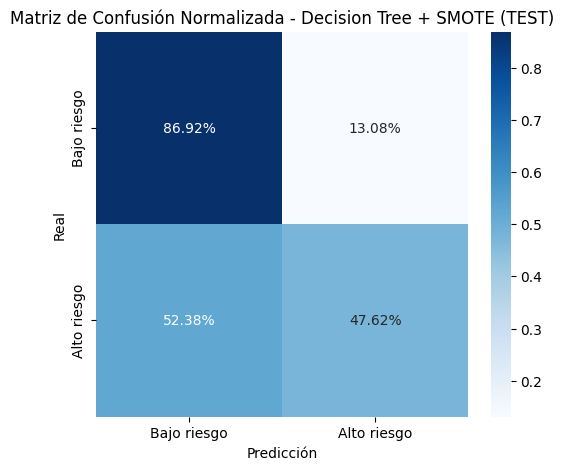

In [106]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt_smote = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

modelo_dt_smote.fit(X_train_sm, y_train_sm)

dt_smote_metrics = evaluar_overfitting(
    modelo_dt_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="Decision Tree + SMOTE"
)

results.append({"Modelo": "Decision Tree + SMOTE", **dt_smote_metrics})

### ***UNDERSAMPLING***


===== Decision Tree + Undersampling ====
---- TRAIN ----
AUC: 0.8995
Recall: 0.7820
Precision: 0.7333
F1: 0.7569

---- TEST ----
AUC: 0.8046
Recall: 0.6762
Precision: 0.2710
F1: 0.3869

---- GAP (Train-Test) ----
AUC gap: 0.0949
Recall gap: 0.1058


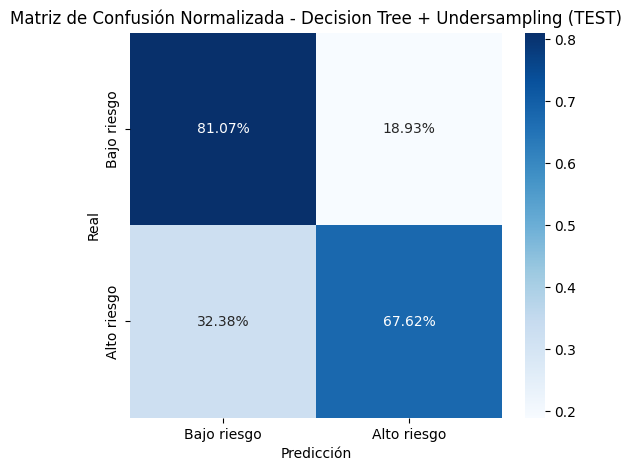

In [107]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt_under = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

modelo_dt_under.fit(X_train_under, y_train_under)

dt_under_metrics = evaluar_overfitting(
    modelo_dt_under,
    X_train_under, y_train_under,
    X_test, y_test,
    threshold=0.4,
    nombre="Decision Tree + Undersampling"
)

results.append({"Modelo": "Decision Tree + Undersampling", **dt_under_metrics})

## **SVM**

### ***BALANCEO PROPIO***


===== SVM Linear Kernel (Class Weight Balanced) ====
---- TRAIN ----
AUC: 0.8876
Recall: 0.2607
Precision: 0.5140
F1: 0.3459

---- TEST ----
AUC: 0.8671
Recall: 0.2190
Precision: 0.4107
F1: 0.2857

---- GAP (Train-Test) ----
AUC gap: 0.0204
Recall gap: 0.0416


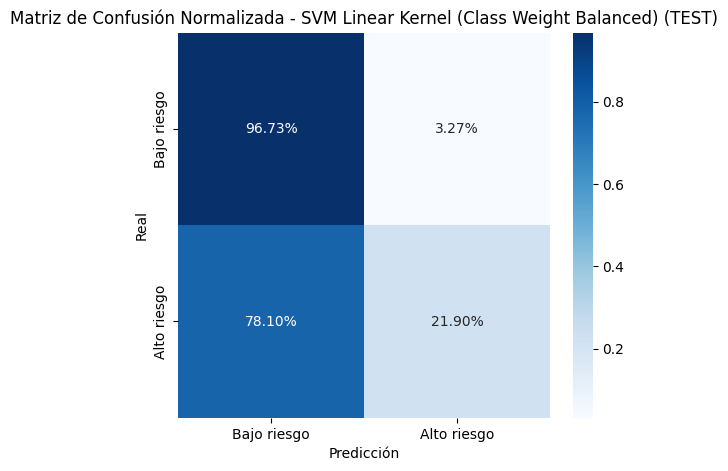

In [108]:
from sklearn.svm import SVC

modelo_svm = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
    class_weight='balanced'
)

modelo_svm.fit(X_train, y_train)

svm_metrics = evaluar_overfitting(
    modelo_svm,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="SVM Linear Kernel (Class Weight Balanced)"
)

results.append({"Modelo": "SVM Linear Kernel", **svm_metrics})

### ***SMOTE***


===== SVM Linear Kernel + SMOTE ====
---- TRAIN ----
AUC: 0.9033
Recall: 0.8219
Precision: 0.7226
F1: 0.7691

---- TEST ----
AUC: 0.8577
Recall: 0.6571
Precision: 0.2961
F1: 0.4083

---- GAP (Train-Test) ----
AUC gap: 0.0455
Recall gap: 0.1648


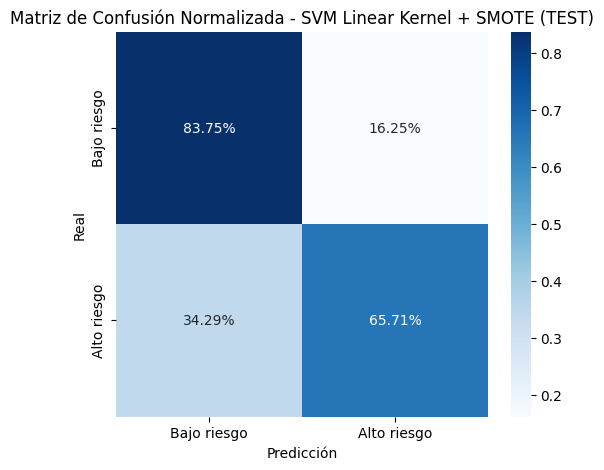

In [110]:
from sklearn.svm import SVC

modelo_svm_smote = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
)

modelo_svm_smote.fit(X_train_sm, y_train_sm)

svm_smote_metrics = evaluar_overfitting(
    modelo_svm_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="SVM Linear Kernel + SMOTE"
)

results.append({"Modelo": "SVM Linear Kernel + SMOTE", **svm_smote_metrics})

### ***UNDERSAMPLING***


===== SVM Linear Kernel + Undersampling ====
---- TRAIN ----
AUC: 0.8881
Recall: 0.7796
Precision: 0.7199
F1: 0.7486

---- TEST ----
AUC: 0.8663
Recall: 0.7143
Precision: 0.3012
F1: 0.4237

---- GAP (Train-Test) ----
AUC gap: 0.0219
Recall gap: 0.0653


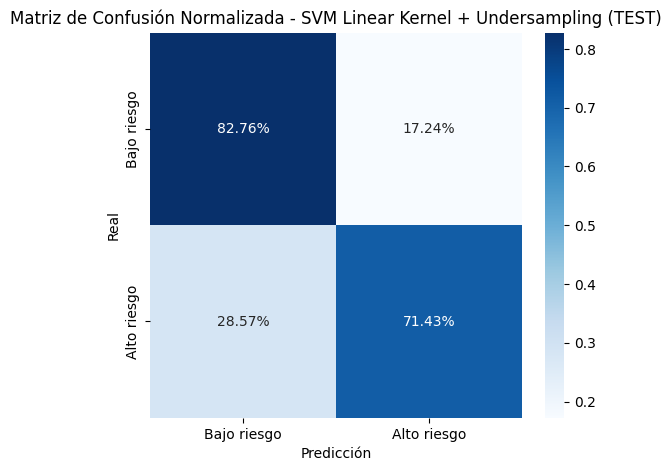

In [111]:
from sklearn.svm import SVC

modelo_svm_under = SVC(
    kernel='linear',
    probability=True,
    random_state=42
)

modelo_svm_under.fit(X_train_under, y_train_under)

svm_under_metrics = evaluar_overfitting(
    modelo_svm_under,
    X_train_under, y_train_under,
    X_test, y_test,
    threshold=0.4,
    nombre="SVM Linear Kernel + Undersampling"
)

results.append({"Modelo": "SVM Linear Kernel + Undersampling", **svm_under_metrics})

In [112]:
import pandas as pd

df_results = pd.DataFrame(results)

print("pruebas con balanceo:")
df_results

pruebas con balanceo:


,Modelo,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap,recall_gap
0,Random Forest (Class Weight Balanced),0.918593,0.943128,0.239904,0.382508,0.845165,0.847619,0.215496,0.343629,0.073428,0.095509
1,Random Forest + SMOTE,0.958675,0.895337,0.778689,0.832949,0.845137,0.580952,0.309645,0.403974,0.113539,0.314385
2,Random Forest (Undersampling),0.934469,0.841232,0.747368,0.791527,0.853348,0.733333,0.290566,0.416216,0.081121,0.107899
3,XGBoost,0.955123,0.937996,0.692674,0.796882,0.845977,0.733333,0.269231,0.393862,0.109146,0.204663
4,Balanced Random Forest (Class Weight Balanced),0.998746,1.000000,0.330721,0.497055,0.847435,0.800000,0.247788,0.378378,0.151311,0.200000
5,Logistic Regression,0.887826,0.881517,0.255670,0.396377,0.868101,0.857143,0.252101,0.389610,0.019725,0.024374
6,Logistic Regression + SMOTE,0.903582,0.824901,0.721162,0.769551,0.859871,0.695238,0.308017,0.426901,0.043712,0.129663
7,Logistic Regression + Undersampling,0.887912,0.784360,0.708779,0.744657,0.867035,0.723810,0.299213,0.423398,0.020878,0.060551
8,Decision Tree Classifier,0.890845,0.947867,0.244051,0.388161,0.760206,0.771429,0.199017,0.316406,0.130640,0.176439
9,Decision Tree + SMOTE,0.933921,0.818452,0.785714,0.801749,0.802803,0.476190,0.274725,0.348432,0.131117,0.342262


EL mejor modelo es Logistic Regression	con la clase weight balanced. Muestra el mejor AUC para test, un con valor de recall alto. Además si observamos la diferencia entre entre los los AUC de train - test y los de recall, la diferencia es la mas baja, lo que muestra que generaliza bastante bien.

## Validación Cruzada (Logistic Regression - Class Weight Balanced)

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

modelo_lr_cw_cv = LogisticRegression(
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)

# Realizar validación cruzada de 5 folds en los datos de entrenamiento originales
scores_lr_cw = cross_val_score(
    modelo_lr_cw_cv,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)

print(f"Scores de Validación Cruzada (ROC AUC) para Logistic Regression (Class Weight Balanced): {scores_lr_cw}")
print(f"ROC AUC promedio: {scores_lr_cw.mean():.4f}")
print(f"Desviación estándar del ROC AUC: {scores_lr_cw.std():.4f}")

Scores de Validación Cruzada (ROC AUC) para Logistic Regression (Class Weight Balanced): [0.85078091 0.88016348 0.89476013 0.89434708 0.86599019]
ROC AUC promedio: 0.8772
Desviación estándar del ROC AUC: 0.0169


In [113]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   1114 non-null   float64
 1   genero                                 1114 non-null   int64  
 2   colesterol_total                       1114 non-null   float64
 3   hdl                                    1114 non-null   float64
 4   trigliceridos                          1114 non-null   float64
 5   proteina_c                             1114 non-null   float64
 6   bmi                                    1114 non-null   float64
 7   fumo_100_cigarrillos                   1114 non-null   int64  
 8   horas_suenio                           1114 non-null   float64
 9   anhedonia                              1114 non-null   float64
 10  hemoglobina                            1114 non-null   float64
 11  crea